영상의 화질 향상 기법

In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as pit
drive.mount('/content/gdrive')

Mounted at /content/gdrive


상하위 절단법
min값 max값 결정 -> 하위 m% 미만에 해당하는 픽셀들은 min과 같은 밝기값을 갖도록 설정

상위 n+1% 이상에 해당하는 픽셀들은 max와 같은 밝기값을 갖도록 설정

★★★ 히스토그램 평활화 ★★★
1. 히스토그램을 구한다.
일련의 과정 후에 y 반올림


(256, 256, 3)


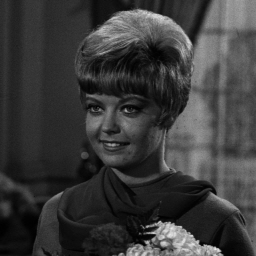

In [30]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/girl.jpg')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#pit.imshow (gimg1, cmap= 'gray')
cv2_imshow(gimg1)


In [31]:
outimg = np.zeros(gimg1.shape, dtype = np.uint8)

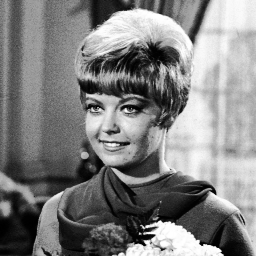

In [32]:
outimg= cv2.equalizeHist(gimg1)
cv2_imshow(outimg)

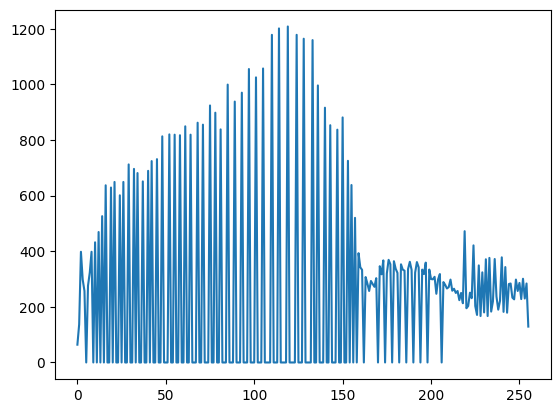

In [33]:
hist = cv2.calcHist([outimg], [0], None, [256], [0,256])
pit.plot(hist)

In [37]:
myHist = np.zeros((256, 1), dtype=np.int32)

히스토그램 만들기

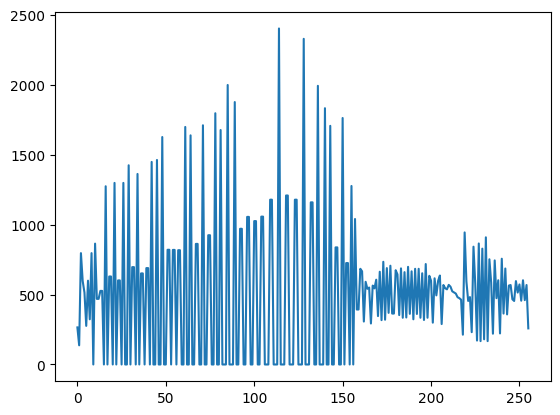

In [45]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    myHist[outimg[h,w]] += 1

pit.plot(myHist)

In [39]:
cumulHist = np.zeros((256, 1), dtype=np.int32)

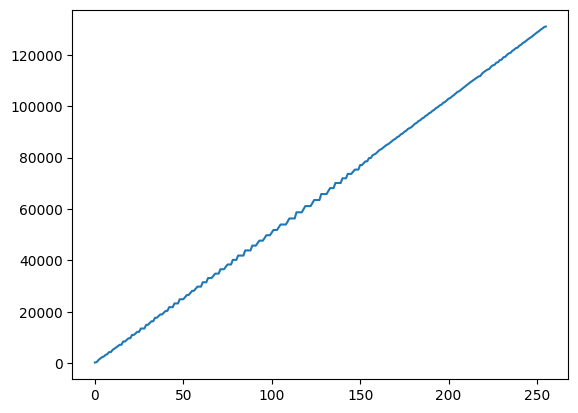

In [46]:
cumulHist[0] = myHist[0]
for i in range(1, 256):
  cumulHist[i] = cumulHist[i-1] + myHist[i]

pit.plot(cumulHist)

히스토그램 평활화

In [41]:
equalHist = np.zeros((256, 1), dtype=np.int32)

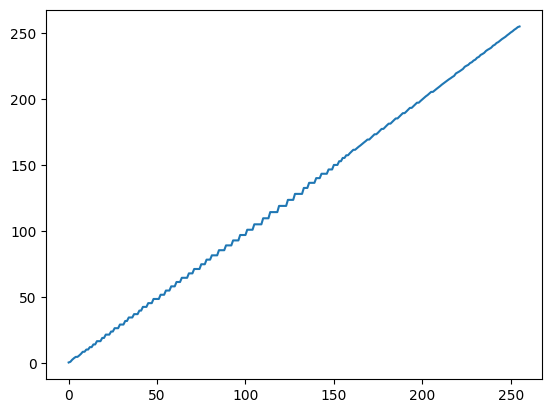

In [43]:
numOfPixel = gimg1.shape[0] * gimg1.shape[1]
equalHist = cumulHist/ numOfPixel
equalHist = equalHist * 255

pit.plot(equalHist)

/tmp/ipython-input-1700918746.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outimg[h,w] = equalHist[outimg[h,w]]


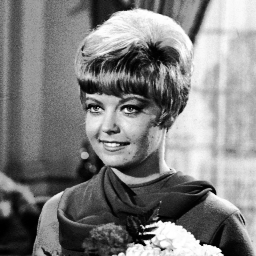

In [44]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    outimg[h,w] = equalHist[outimg[h,w]]

cv2_imshow(outimg)